<a href="https://colab.research.google.com/github/ReidelVichot/LC_identification/blob/main/annual_AQI_012125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting the Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# -- Setting environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# -- Load county shapefiles
dir = "/content/drive/MyDrive/Disertation/countyshp/"
county = gpd.read_file(dir + "tl_2010_us_county00/tl_2010_us_county00.shp")
county = county[["CNTYIDFP00", "geometry"]]

Mounted at /content/drive


#Defining Functions

In [ ]:
def gen_GEOID(df):
  # generate GEOID
  df["GEOID"] = df["State Code"].astype(str).str.zfill(2) + df["County Code"].astype(str).str.zfill(3)
  df = df.drop(columns=["State Code", "County Code"])
  return df

def gen_year(df):
  # get year
  df["year"] = df["Date"].str[:4].astype(int)
  df = df.drop(columns="Date")
  return df

def grouping_AQI(df):
  df = df.groupby(["GEOID", "year"]).agg(["mean", "std", "max", "min"])
  # combining columns
  df.columns = ["_".join(col) for col in df.columns]
  df = df.reset_index()
  return df

def grouping(df):
  df = df.groupby(["GEOID", "year", 'Units of Measure']).agg(["mean", "std", "max", "min"])
  # combining columns
  df.columns = ["_".join(col) for col in df.columns]
  df = df.reset_index()
  return df

def get_AQI(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/AQI"
  fname = f"/daily_aqi_by_county_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date", "AQI"]]
  return df

def get_CO(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/CO"
  fname = f"/daily_42101_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean", 'Units of Measure']]
  df.columns = ["State Code", "County Code", "Date", "CO", 'Units of Measure']
  return df

def get_NO2(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/NO2"
  fname = f"/daily_42602_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean", 'Units of Measure']]
  df.columns = ["State Code", "County Code", "Date", "NO2", 'Units of Measure']
  return df

def get_Ozone(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/Ozone"
  fname = f"/daily_44201_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean", 'Units of Measure']]
  df.columns = ["State Code", "County Code", "Date", "Ozone", 'Units of Measure']
  return df

def get_SO2(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/SO2"
  fname = f"/daily_42401_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean", 'Units of Measure']]
  df.columns = ["State Code", "County Code", "Date", "SO2", 'Units of Measure']
  return df

def get_PM25(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/PM25"
  fname = f"/daily_SPEC_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean", 'Units of Measure']]
  df.columns = ["State Code", "County Code", "Date", "PM2.5", 'Units of Measure']
  return df

def get_PM10(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/PM10"
  fname = f"/daily_PM10SPEC_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean", 'Units of Measure']]
  df.columns = ["State Code", "County Code", "Date", "PM10", 'Units of Measure']
  return df

def get_param(param, year):
  match param:
    case "AQI":
      return get_AQI(year)
    case "CO":
      return get_CO(year)
    case "NO2":
      return get_CO(year)
    case "SO2":
      return get_SO2(year)
    case "Ozone":
      return get_Ozone(year)

#Calculating Parameters

##AQI

In [ ]:
# -- Create aqi dataframe
aqi = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping_AQI(gen_year(gen_GEOID(get_AQI(year))))
  aqi = pd.concat([aqi, df]).reset_index().drop(columns="index")

# -- Merge aqi and county
print(len(aqi))
aqi = county.merge(aqi, right_on="GEOID", left_on="CNTYIDFP00", how="right")
aqi = aqi.drop(columns="CNTYIDFP00")
print(len(aqi))

26504
26504


##CO

In [ ]:
# -- Create CO dataframe
co = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_CO(year))))
  co = pd.concat([co, df]).reset_index().drop(columns="index")

# -- Merge CO and county
print(len(co))
co = county.merge(co, right_on="GEOID", left_on="CNTYIDFP00", how="right")
co = co.drop(columns="CNTYIDFP00")
print(len(co))

5214
5214


##NO2

In [ ]:
# -- Create NO2 dataframe
no2 = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_NO2(year))))
  no2 = pd.concat([no2, df]).reset_index().drop(columns="index")

# -- Merge NO2 and county
print(len(no2))
no2 = county.merge(no2, right_on="GEOID", left_on="CNTYIDFP00", how="right")
no2 = no2.drop(columns="CNTYIDFP00")
print(len(no2))

6328
6328


##Ozone

In [ ]:
# -- Create ozone dataframe
ozone = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_Ozone(year))))
  ozone = pd.concat([ozone, df]).reset_index().drop(columns="index")

# -- Merge ozone and county
print(len(ozone))
ozone = county.merge(ozone, right_on="GEOID", left_on="CNTYIDFP00", how="right")
ozone = ozone.drop(columns="CNTYIDFP00")
print(len(ozone))

19088
19088


##SO2

In [ ]:
# -- Create so2 dataframe
so2 = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_SO2(year))))
  so2 = pd.concat([so2, df]).reset_index().drop(columns="index")

# -- Merge so2 and county
print(len(so2))
so2 = county.merge(so2, right_on="GEOID", left_on="CNTYIDFP00", how="right")
so2 = so2.drop(columns="CNTYIDFP00")
print(len(so2))

8248
8248


#Descriptive Statistics

In [ ]:
# Removing Non-contiguous counties
for i in ['02', '15', '60', '66', '69', '72', '78', "80"]:
  aqi = aqi[aqi.GEOID.str[:2] != i]
  co = co[co.GEOID.str[:2] != i]
  no2 = no2[no2.GEOID.str[:2] != i]
  ozone = ozone[ozone.GEOID.str[:2] != i]
  so2 = so2[so2.GEOID.str[:2] != i]
  pm25 = pm25[pm25.GEOID.str[:2] != i]
  pm10 = pm10[pm10.GEOID.str[:2] != i]

In [ ]:
# Save Everything
aqi.to_csv("/content/drive/MyDrive/Disertation/aqi.csv", index=False)
co.to_csv("/content/drive/MyDrive/Disertation/co.csv", index=False)
no2.to_csv("/content/drive/MyDrive/Disertation/no2.csv", index=False)
ozone.to_csv("/content/drive/MyDrive/Disertation/ozone.csv", index=False)
so2.to_csv("/content/drive/MyDrive/Disertation/so2.csv", index=False)


In [ ]:
# Import everything
aqi = pd.read_csv("/content/drive/MyDrive/Disertation/aqi.csv")
print(f"AQI imported ... {len(aqi)} entries")
co = pd.read_csv("/content/drive/MyDrive/Disertation/co.csv")
print(f"CO imported ... {len(co)} entries")
no2 = pd.read_csv("/content/drive/MyDrive/Disertation/no2.csv")
print(f"NO2 imported ... {len(no2)} entries")
ozone = pd.read_csv("/content/drive/MyDrive/Disertation/ozone.csv")
print(f"Ozone imported ... {len(ozone)} entries")
so2 = pd.read_csv("/content/drive/MyDrive/Disertation/so2.csv")
print(f"SO2 imported ... {len(so2)} entries")
pm25 = pd.read_csv("/content/drive/MyDrive/Disertation/pm25.csv")
print("......... Completed .........")

AQI imported ... 25785 entries
CO imported ... 5039 entries
NO2 imported ... 6238 entries
Ozone imported ... 18919 entries
SO2 imported ... 8039 entries
PM2.5 imported ... 14551 entries
PM10 imported ... 9943 entries
......... Completed .........


In [ ]:
# Treatmen Counties
treatments = ["18063","37179","34003","25027","13151","48329","27003","48135","42071","51107","42077","06065","34007"]

06065 18063 25027 27003 34003 34007 42071 42077 51107 13151 37179 48135 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


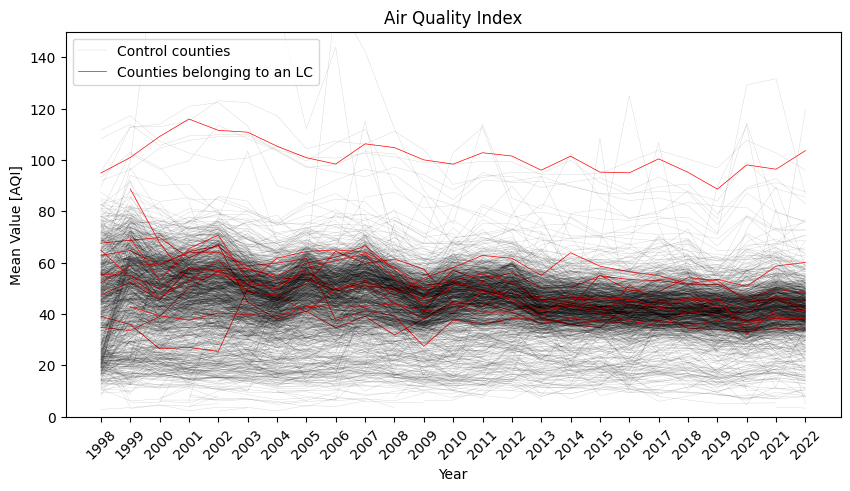

In [ ]:
# Plotting trends
fig, ax = plt.subplots(figsize=(10,5))

flag0 = False
flag1 = False

for i in aqi.GEOID.unique():
  if i in treatments:
    print(i, end=" ")
    df = aqi[aqi.GEOID == i]
    if flag0 == False:
      ax.plot(df.year, df.AQI_mean, color="red", alpha=1, linewidth=0.5, label="Counties belonging to an LC")
      flag0 = True
    else: ax.plot(df.year, df.AQI_mean, color="red", alpha=1, linewidth=0.5)
  else:
    if flag1 == False:
      df = aqi[aqi.GEOID == i]
      ax.plot(df.year, df.AQI_mean, color="black", alpha=0.2, linewidth=0.25, label="Control counties")
      flag1 = True
    else:
      df = aqi[aqi.GEOID == i]
      ax.plot(df.year, df.AQI_mean, color="black", alpha=0.2, linewidth=0.25)

ax.set_xlabel("Year")
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(range(1998, 2023))
ax.set_ylabel("Mean Value [AQI]")
ax.set_ylim(0,150)
ax.legend()
ax.set_title("Air Quality Index")

fig.show()


Caption: Air Quality Index (AQI) by County. Red lines represent counties that fulfill the treatment criteria, and gray lines represent counties that conform the donor pool to construct a synthetic control.

06065, 18063, 25027, 27003, 34003, 34007, 42071, 42077, 

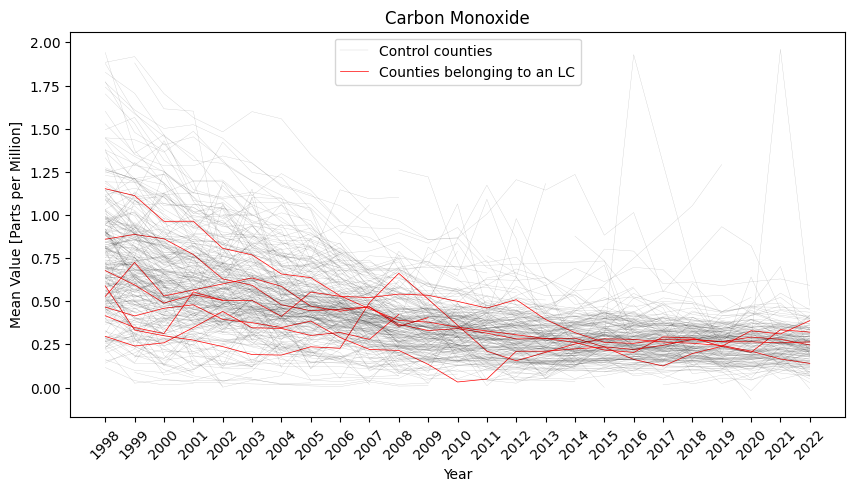

In [ ]:
# Plotting trends
fig, ax = plt.subplots(figsize=(10,5))

flag0 = False
flag1 = False

for i in co.GEOID.unique():
  if i in treatments:
    print(i, end=", ")
    df = co[co.GEOID == i]
    if flag0 == False:
      ax.plot(df.year, df.CO_mean, color="red", alpha=1, linewidth=0.5, label="Counties belonging to an LC")
      flag0 = True
    else: ax.plot(df.year, df.CO_mean, color="red", alpha=1, linewidth=0.5)
  else:
    if flag1 == False:
      df = co[co.GEOID == i]
      ax.plot(df.year, df.CO_mean, color="black", alpha=0.2, linewidth=0.25, label="Control counties")
      flag1 = True
    else:
      df = co[co.GEOID == i]
      ax.plot(df.year, df.CO_mean, color="black", alpha=0.2, linewidth=0.25)

ax.set_xlabel("Year")
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(range(1998, 2023))
ax.set_ylabel("Mean Value [Parts per Million]")

ax.legend()
ax.set_title("Carbon Monoxide")

fig.show()




Caption: Carbon Monoxide (CO) by County. Red lines represent counties that fulfill the treatment criteria, and gray lines represent counties that conform the donor pool to construct a synthetic control. Possible treatment counties include: 06065, 18063, 25027, 27003, 34003, 34007, 42071, and 42077.

06065, 18063, 25027, 34003, 34007, 42071, 42077, 51107, 27003, 

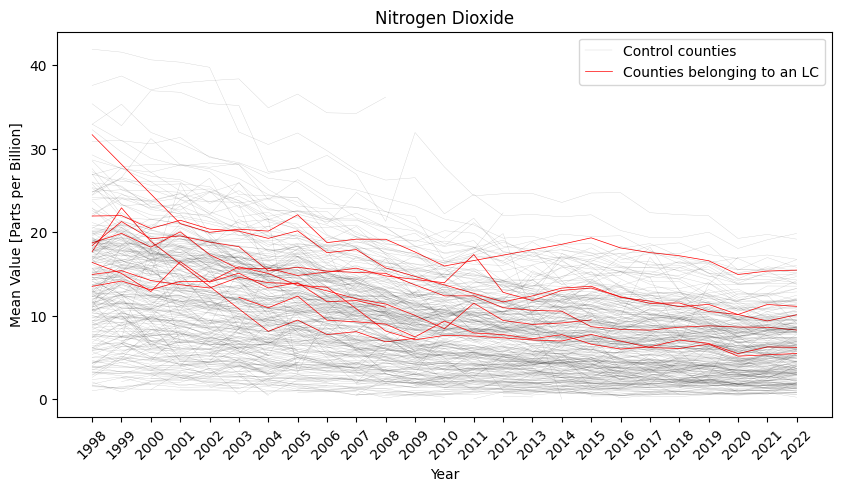

In [ ]:
# Plotting trends
fig, ax = plt.subplots(figsize=(10,5))

flag0 = False
flag1 = False

for i in no2.GEOID.unique():
  if i in treatments:
    print(i, end=", ")
    df = no2[no2.GEOID == i]
    if flag0 == False:
      ax.plot(df.year, df.NO2_mean, color="red", alpha=1, linewidth=0.5, label="Counties belonging to an LC")
      flag0 = True
    else: ax.plot(df.year, df.NO2_mean, color="red", alpha=1, linewidth=0.5)
  else:
    if flag1 == False:
      df = no2[no2.GEOID == i]
      ax.plot(df.year, df.NO2_mean, color="black", alpha=0.2, linewidth=0.25, label="Control counties")
      flag1 = True
    else:
      df = no2[no2.GEOID == i]
      ax.plot(df.year, df.NO2_mean, color="black", alpha=0.2, linewidth=0.25)

ax.set_xlabel("Year")
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(range(1998, 2023))
ax.set_ylabel("Mean Value [Parts per Billion]")

ax.legend()
ax.set_title("Nitrogen Dioxide")

fig.show()


Caption: Nitrogen Dioxide (NO2) by County. Red lines represent counties that fulfill the treatment criteria, and gray lines represent counties that conform the donor pool to construct a synthetic control. Possible treatment counties include: 06065, 18063, 25027, 34003, 34007, 42071, 42077, 51107, and 27003.

In [ ]:
ozone.head()

,geometry,GEOID,year,Units of Measure,Ozone_mean,Ozone_std,Ozone_max,Ozone_min
0,"POLYGON ((-85.9788 33.32749, -85.97854 33.3325...",01027,1998,Parts per million,0.036429,0.011298,0.065000,0.004353
1,"POLYGON ((-85.58234 34.45913, -85.5832 34.4589...",01049,1998,Parts per million,0.040460,0.017328,0.090118,0.002471
2,"POLYGON ((-86.4125 32.58942, -86.4125 32.58946...",01051,1998,Parts per million,0.038803,0.013961,0.087941,0.006765
3,"POLYGON ((-85.71087 31.19518, -85.71053 31.195...",01061,1998,Parts per million,0.028274,0.010792,0.062882,0.005588
4,"POLYGON ((-87.08752 33.28531, -87.08753 33.285...",01073,1998,Parts per million,0.029442,0.011250,0.074118,0.000000


06065, 25027, 27003, 34003, 34007, 42071, 42077, 51107, 13151, 37179, 18063, 

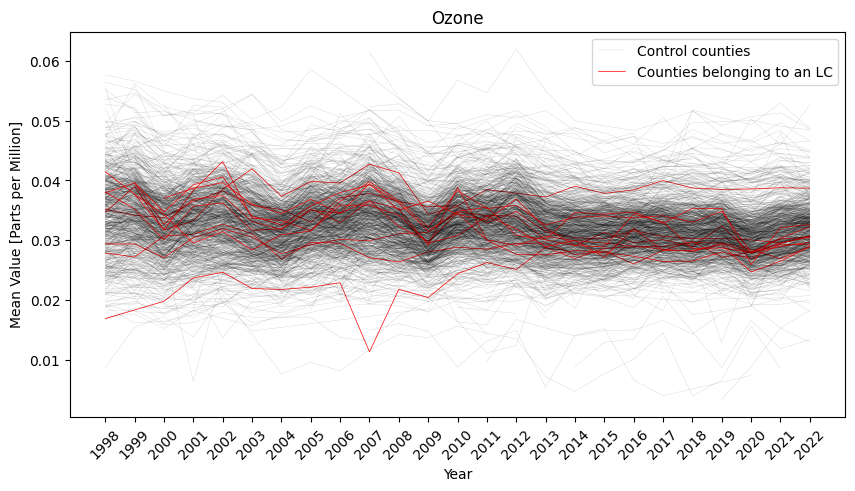

In [ ]:
# Plotting trends
fig, ax = plt.subplots(figsize=(10,5))

flag0 = False
flag1 = False

for i in ozone.GEOID.unique():
  if i in treatments:
    print(i, end=", ")
    df = ozone[ozone.GEOID == i]
    if flag0 == False:
      ax.plot(df.year, df.Ozone_mean, color="red", alpha=1, linewidth=0.5, label="Counties belonging to an LC")
      flag0 = True
    else: ax.plot(df.year, df.Ozone_mean, color="red", alpha=1, linewidth=0.5)
  else:
    if flag1 == False:
      df = ozone[ozone.GEOID == i]
      ax.plot(df.year, df.Ozone_mean, color="black", alpha=0.2, linewidth=0.25, label="Control counties")
      flag1 = True
    else:
      df = ozone[ozone.GEOID == i]
      ax.plot(df.year, df.Ozone_mean, color="black", alpha=0.2, linewidth=0.25)

ax.set_xlabel("Year")
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(range(1998, 2023))
ax.set_ylabel("Mean Value [Parts per Million]")

ax.legend()
ax.set_title("Ozone")

fig.show()

Caption: Ozone (O3) by County. Red lines represent counties that fulfill the treatment criteria, and gray lines represent counties that conform the donor pool to construct a synthetic control. Possible treatment counties include:  06065, 25027, 27003, 34003, 34007, 42071, 42077, 51107, 13151, 37179, and 18063.

In [ ]:
so2.head()

,geometry,GEOID,year,Units of Measure,SO2_mean,SO2_std,SO2_max,SO2_min
0,"POLYGON ((-87.63428 34.56915, -87.6344 34.5691...",01033,1998,Parts per billion,2.940491,2.827981,20.833333,1.000
1,"MULTIPOLYGON (((-86.14981 34.53363, -86.14981 ...",01071,1998,Parts per billion,4.041778,3.649102,31.750000,1.000
2,"POLYGON ((-87.08752 33.28531, -87.08753 33.285...",01073,1998,Parts per billion,6.504881,4.854874,32.875000,0.200
3,"POLYGON ((-87.10576 34.60562, -87.1058 34.6015...",01079,1998,Parts per billion,2.671788,1.720296,13.041667,0.075
4,"POLYGON ((-88.4062 30.58971, -88.40634 30.5925...",01097,1998,Parts per billion,8.870135,12.351846,99.083333,0.000


06065, 18063, 25027, 34003, 34007, 42071, 42077, 27003, 

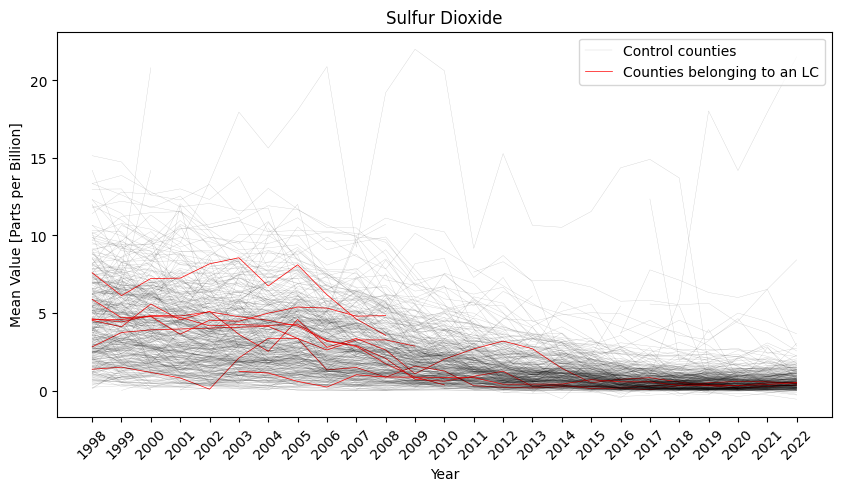

In [ ]:
# Plotting trends
fig, ax = plt.subplots(figsize=(10,5))

flag0 = False
flag1 = False

for i in so2.GEOID.unique():
  if i in treatments:
    print(i, end=", ")
    df = so2[so2.GEOID == i]
    if flag0 == False:
      ax.plot(df.year, df.SO2_mean, color="red", alpha=1, linewidth=0.5, label="Counties belonging to an LC")
      flag0 = True
    else: ax.plot(df.year, df.SO2_mean, color="red", alpha=1, linewidth=0.5)
  else:
    if flag1 == False:
      df = so2[so2.GEOID == i]
      ax.plot(df.year, df.SO2_mean, color="black", alpha=0.2, linewidth=0.25, label="Control counties")
      flag1 = True
    else:
      df = so2[so2.GEOID == i]
      ax.plot(df.year, df.SO2_mean, color="black", alpha=0.2, linewidth=0.25)

ax.set_xlabel("Year")
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(range(1998, 2023))
ax.set_ylabel("Mean Value [Parts per Billion]")

ax.legend()
ax.set_title("Sulfur Dioxide")

fig.show()

Caption: Sulfur Dioxide (SO2) by County. Red lines represent counties that fulfill the treatment criteria, and gray lines represent counties that conform the donor pool to construct a synthetic control. Possible treatment counties include: 06065, 18063, 25027, 34003, 34007, 42071, 42077, and 27003.